# Motif K-mer Analysis - Promoters

In [22]:
### header ###
__author__ = "Jenhan Tao"
__license__ = "BSD"
__email__ = ".jenhantao@gmail.com"

### imports ###
import sys
import os
import pandas as pd
import numpy as np
import argparse
import matplotlib
import itertools
import scipy
import matplotlib.pyplot as plt 
import seaborn as sns
import pickle
import sklearn
from sklearn import linear_model
from sklearn import preprocessing
import multiprocessing
import threading
from collections import Counter
import time
from random import shuffle
from sklearn import cross_validation
### notebook specific configuration ###
%matplotlib inline
sys.path.append("/home/jtao/code/seq_merge_pipe/")
matplotlib.pylab.rcParams['savefig.dpi'] = 200
sys.setrecursionlimit(3000)
os.chdir('/gpfs/data01/glasslab/home/jtao/analysis/signals_analysis/')
sns.set_context('notebook')
%load_ext autoreload
%autoreload 2
%env PATH=/gpfs/data01/glasslab/home/jtao/perl5/bin:/gpfs/data01/glasslab/home/jtao/software/anaconda3/bin:/home/jtao/software/bin:/usr/local/sbin:/usr/sbin:/usr/bin:/usr/local/bin:/usr/bin:/gpfs/data01/glasslab/home/jtao/software/homer/bin:/gpfs/data01/glasslab/home/jtao/software/weblogo:/home/jtao/code/seq_merge_pipe:/home/vlink/mouse_strains/marge/shifting:/bioinformatics/glassutils/scripts:/bioinformatics/software/meme/bin



The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload
env: PATH=/gpfs/data01/glasslab/home/jtao/perl5/bin:/gpfs/data01/glasslab/home/jtao/software/anaconda3/bin:/home/jtao/software/bin:/usr/local/sbin:/usr/sbin:/usr/bin:/usr/local/bin:/usr/bin:/gpfs/data01/glasslab/home/jtao/software/homer/bin:/gpfs/data01/glasslab/home/jtao/software/weblogo:/home/jtao/code/seq_merge_pipe:/home/vlink/mouse_strains/marge/shifting:/bioinformatics/glassutils/scripts:/bioinformatics/software/meme/bin


## calculate differentially expressed genes

In [2]:
tag_dirs = sorted(os.listdir('./tag_directories_rna/'))
treated_dirs = ' '.join(['./tag_directories_rna/' + x for x in tag_dirs if not '_Veh-1h_' in x])
veh_dirs = ' '.join(['./tag_directories_rna/' +x for x in tag_dirs if  '_Veh-1h_' in x])

In [92]:
!analyzeRepeats.pl rna mm10 -condenseGenes -count exons -noadj -d $veh_dirs $treated_dirs > raw.tsv

	Tag Directories:
		./tag_directories_rna/C57Bl6_BMDM_RNA_Veh-1h_GJF_16-09-20-rep1
		./tag_directories_rna/C57Bl6_BMDM_RNA_Veh-1h_GJF_16-09-20-rep2
		./tag_directories_rna/C57Bl6_BMDM_RNA_IFNg-1h_GJF_16-09-20-rep1
		./tag_directories_rna/C57Bl6_BMDM_RNA_IFNg-1h_GJF_16-09-20-rep2
		./tag_directories_rna/C57Bl6_BMDM_RNA_IL4-1h_GJF_16-09-20-rep1
		./tag_directories_rna/C57Bl6_BMDM_RNA_IL4-1h_GJF_16-09-20-rep2
		./tag_directories_rna/C57Bl6_BMDM_RNA_KLA-1h_Newton-Josh_14-03-01-rep1
		./tag_directories_rna/C57Bl6_BMDM_RNA_KLA-1h_Newton-Josh_14-03-01-rep2
		./tag_directories_rna/C57Bl6_BMDM_RNA_R848-1h_GJF_16-09-20-rep1
		./tag_directories_rna/C57Bl6_BMDM_RNA_R848-1h_GJF_16-09-20-rep2
		./tag_directories_rna/C57Bl6_BMDM_RNA_Tgfb-1h_GJF_16-09-20-rep1
		./tag_directories_rna/C57Bl6_BMDM_RNA_Tgfb-1h_GJF_16-09-20-rep2
		./tag_directories_rna/C57Bl6_BMDM_RNA_VehTgfB-1h_GJF_16-09-20-rep2
		./tag_directories_rna/C57Bl6_BMDM_RNA_VehTgfB-1h_GJF_16-09_20-rep1
		./tag_directories_rna/C57Bl6_BMDM_RNA_no

In [93]:
with open('./raw.tsv') as f:
    data = f.readline()

In [95]:
conditions = [x.split('/')[2].split('_')[3] for x in data.split('\t')[8:]]
condition_string = ' '.join(conditions)
!getDiffExpression.pl ./raw.tsv $condition_string > edgeR_out.tsv


	Differential Expression Program: edgeR
	Autodetecting input file format...
	Using edgeR to calculate differential expression/enrichment...
	Autodetected analyzeRepeats.pl file
	Output Stats Veh-1h vs. IFNg-1h:
		Total Genes: 24453
		Total Up-regulated in IFNg-1h vs. Veh-1h: 63 (0.258%) [log2fold>1, FDR<0.05]
		Total Dn-regulated in IFNg-1h vs. Veh-1h: 142 (0.581%) [log2fold<-1, FDR<0.05]
	Output Stats Veh-1h vs. IL4-1h:
		Total Genes: 24453
		Total Up-regulated in IL4-1h vs. Veh-1h: 28 (0.115%) [log2fold>1, FDR<0.05]
		Total Dn-regulated in IL4-1h vs. Veh-1h: 39 (0.159%) [log2fold<-1, FDR<0.05]
	Output Stats Veh-1h vs. KLA-1h:
		Total Genes: 24453
		Total Up-regulated in KLA-1h vs. Veh-1h: 617 (2.523%) [log2fold>1, FDR<0.05]
		Total Dn-regulated in KLA-1h vs. Veh-1h: 324 (1.325%) [log2fold<-1, FDR<0.05]
	Output Stats Veh-1h vs. R848-1h:
		Total Genes: 24453
		Total Up-regulated in R848-1h vs. Veh-1h: 5 (0.020%) [log2fold>1, FDR<0.05]
		Total Dn-regulated in R848-1h vs. Veh-1h: 38 (0.

In [3]:
diff_expression_frame = pd.read_csv('./edgeR_out.tsv', sep='\t')
columns = diff_expression_frame.columns.values
columns[0] = 'refseq'
columns = [x.lower() for x in columns]
diff_expression_frame.columns = columns

## Read in Peak and Sequence Data

In [ ]:
! annotatePeaks.pl merged_atac_peaks_filtered_resized.tsv mm10 > ./atac_annotated_peaks.tsv

In [9]:
summary_frame = pd.read_csv('./group_atac_summary.tsv' , sep='\t')
summary_frame = summary_frame.fillna('0')
for col in summary_frame.columns[5:]:
    floatValues = []
    for val in summary_frame[col].values.astype(str):
        if ',' in val:
            maxVal = np.mean([float(x) for x in val.split(',')])
            floatValues.append(maxVal)
        else:
            floatValues.append(float(val))
    summary_frame[col] = floatValues
summary_frame.index = summary_frame['ID'].values

# remove peaks in unknown/random chromosomes
summary_frame = summary_frame[~summary_frame['chr'].str.contains('random')]
summary_frame = summary_frame[~summary_frame['chr'].str.contains('Un')]


annotation_frame = pd.read_csv('atac_annotated_peaks.tsv', sep='\t')

columns = annotation_frame.columns.values
columns[0] = 'PeakID'
annotation_frame.columns = columns
annotation_frame.index = annotation_frame['PeakID'].values

In [10]:
summary_background_frame = pd.read_csv('./background_group_summary.tsv' , sep='\t')
summary_background_frame = summary_background_frame.fillna('0')
for col in summary_background_frame.columns[5:]:
    floatValues = []
    for val in summary_background_frame[col].values.astype(str):
        if ',' in val:
            maxVal = np.mean([float(x) for x in val.split(',')])
            floatValues.append(maxVal)
        else:
            floatValues.append(float(val))
    summary_background_frame[col] = floatValues
summary_background_frame.index = summary_background_frame['ID'].values

/gpfs/data01/glasslab/home/jtao/software/anaconda3/lib/python3.5/site-packages/IPython/core/interactiveshell.py:2723: DtypeWarning: Columns (5,7,8,9,10) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [11]:
### read in sequences as dictionary {peakID: sequence}
with open('./peak_sequences/C57BL6J.fa') as f:
    data = f.readlines()

target_sequence_dict = {}
for line in data:
    if line[0] == '>':
        sequenceName = line.strip()[1:]
    else:
        target_sequence_dict[sequenceName] = line.strip().upper()  

## read in background sequences
with open('./peak_sequences_background/C57BL6J.fa') as f:
    data = f.readlines()
background_sequence_dict = {}
for line in data:
    if line[0] == '>':
        sequenceName = line.strip()[1:]
    else:
        background_sequence_dict[sequenceName] = line.strip().upper()[:200]
intersecting_ids = set(target_sequence_dict.keys()).intersection(set(background_sequence_dict.keys()))
for iid in intersecting_ids:
    del background_sequence_dict[iid]

# Ensemble Model using k-mer pairs

In [2]:
def calculate_kmer_interaction_matrix_single(id_sequence_dict, 
                                      k, 
                                      interaction_distances,
                                      verbose=False,
                                      create_pickle = False,
                                      pickle_prefix = None):
    '''
    Reads in a dictionary with id_sequence_dict and calculates a
    numSequences X interaction_distance X interaction_matrix
    '''
    ids = sorted(id_sequence_dict.keys())
    sequences = [id_sequence_dict[x] for x in ids]
#     print(interaction_distances)
    # initialize kmer indices
    kmer_pair_index_dict = {}
    counter = 0
    kmers = [''.join(x) for x in itertools.product(['A', 'C', 'G', 'T'], repeat=k)]
    kmer_pairs = []
    for i in range(len(kmers)):
        for j in range(len(kmers)):
            kmer_string = '-'.join([kmers[i], kmers[j]])
            kmer_pair_index_dict[kmer_string] = counter
            kmer_pairs.append(kmer_string)
            counter += 1
    # loop through different interaction distances
    interactionMatrixList_dict = {} # {interactionDistance, list of interaction matrices}
    thread_list = []
    for interaction_distance in interaction_distances:
        count_interactions_single(sequences,
                          kmer_pair_index_dict,
                          interaction_distance,
                          verbose,
                          interactionMatrixList_dict)
            
    interactionMatrix_frame_dict = {}
    for distance in interactionMatrixList_dict.keys():
        frame = pd.DataFrame(interactionMatrixList_dict[distance], index = ids, columns=kmer_pairs)
        interactionMatrix_frame_dict[distance] = frame
    if create_pickle:
        if pickle_prefix == None:
            pickle_prefix = './'
        print('writing pickle file')
        pickle.dump(interactionMatrix_frame_dict, open(pickle_prefix + 'interactionMatrix_frame_dict.pickle', 'wb'))
    return interactionMatrix_frame_dict, kmer_pair_index_dict
    

In [3]:
def count_interactions_single(sequences,
                       kmer_pair_index_dict,
                       interaction_distance,
                       verbose,
                       interactionMatrixList_dict
                       ):
    '''
    create a list of matrices of k-mer pairs
    '''
    # extract length of k-mers
    k = len(list(kmer_pair_index_dict.keys())[0].split('-')[0])
    
    # create list to hold results
    interactionMatrix_list = []
    for seq in sequences:
        # initialize matrix for sequence
        num_kmers = len(kmer_pair_index_dict)
        interaction_matrix = np.zeros(num_kmers, dtype=np.int16)
        
       
        scan_start = 0
        # leave room for last interacting kmer
        seq_length = len(seq)
        scan_end = seq_length - (2*k + interaction_distance) + 1
                
        for i in range(scan_start, scan_end):
            start_1 = i
            end_1 = start_1 + k
            
            start_2 = end_1 + interaction_distance
            end_2 = start_2 + k
            
            # calculate kmer
            kmer_1 = seq[start_1: end_1]
            kmer_2 = seq[start_2: end_2]
            
            # get kmer indices
            if not 'N' in kmer_1 and not 'N' in kmer_2:
                index = kmer_pair_index_dict[kmer_1 + '-' + kmer_2]
                # update matrix
                interaction_matrix[index] +=1
#             print(start_1, end_1, start_2, end_2, kmer_1, kmer_2)
        interactionMatrix_list.append(interaction_matrix)

    interactionMatrixList_dict[interaction_distance] = np.array(interactionMatrix_list)




In [4]:
def calculate_kmer_interaction_matrix(id_sequence_dict, 
                                      k, 
                                      interaction_distances,
                                      verbose=False,
                                      create_pickle = False,
                                      pickle_prefix = None):
    '''
    Reads in a dictionary with id_sequence_dict and calculates a
    numSequences X interaction_distance X interaction_matrix
    '''
    ids = sorted(id_sequence_dict.keys())
    sequences = [id_sequence_dict[x] for x in ids]
#     print(interaction_distances)
    # initialize kmer indices
    kmer_pair_index_dict = {}
    counter = 0
    kmers = [''.join(x) for x in itertools.product(['A', 'C', 'G', 'T'], repeat=k)]
    kmer_pairs = []
    for i in range(len(kmers)):
        for j in range(len(kmers)):
            kmer_string = '-'.join([kmers[i], kmers[j]])
            kmer_pair_index_dict[kmer_string] = counter
            kmer_pairs.append(kmer_string)
            counter += 1
    # loop through different interaction distances
    interactionMatrixList_dict = {} # {interactionDistance, list of interaction matrices}
    lock = threading.Lock()
    thread_list = []
    for interaction_distance in interaction_distances:
        try:
            current_thread = threading.Thread(target = count_interactions,
                                              args = (sequences,
                                                      kmer_pair_index_dict,
                                                      interaction_distance,
                                                      verbose,
                                                      lock,
                                                      interactionMatrixList_dict)
                                             )
            thread_list.append(current_thread)
            current_thread.start()
        finally:
            if lock.locked_lock():
                lock.release()
    for current_thread in thread_list:
        current_thread.join()
    interactionMatrix_frame_dict = {}
    for distance in interactionMatrixList_dict.keys():
        frame = pd.DataFrame(interactionMatrixList_dict[distance], index = ids, columns=kmer_pairs)
        interactionMatrix_frame_dict[distance] = frame
    if create_pickle:
        if pickle_prefix == None:
            pickle_prefix = './'
        print('writing pickle file')
        pickle.dump(interactionMatrix_frame_dict, open(pickle_prefix + 'interactionMatrix_frame_dict.pickle', 'wb'))
    return interactionMatrix_frame_dict, kmer_pair_index_dict
    

In [5]:
def count_interactions(sequences,
                       kmer_pair_index_dict,
                       interaction_distance,
                       verbose,
                       thread_lock,
                       interactionMatrixList_dict
                       ):
    '''
    create a list of matrices of k-mer pairs
    '''
    # extract length of k-mers
    k = len(list(kmer_pair_index_dict.keys())[0].split('-')[0])
    
    # create list to hold results
    interactionMatrix_list = []
    for seq in sequences:
        # initialize matrix for sequence
        num_kmers = len(kmer_pair_index_dict)
        interaction_matrix = np.zeros(num_kmers, dtype=np.int16)
        
       
        scan_start = 0
        # leave room for last interacting kmer
        seq_length = len(seq)
        scan_end = seq_length - (2*k + interaction_distance) + 1
                
        for i in range(scan_start, scan_end):
            start_1 = i
            end_1 = start_1 + k
            
            start_2 = end_1 + interaction_distance
            end_2 = start_2 + k
            
            # calculate kmer
            kmer_1 = seq[start_1: end_1]
            kmer_2 = seq[start_2: end_2]
            
            # get kmer indices
            if not 'N' in kmer_1 and not 'N' in kmer_2:
                index = kmer_pair_index_dict[kmer_1 + '-' + kmer_2]
                # update matrix
                interaction_matrix[index] +=1
#             print(start_1, end_1, start_2, end_2, kmer_1, kmer_2)
        interactionMatrix_list.append(interaction_matrix)
        
    while thread_lock.locked_lock():
        time.sleep(1)
    thread_lock.acquire()
    interactionMatrixList_dict[interaction_distance] = np.array(interactionMatrix_list)
    if thread_lock.locked_lock():
        thread_lock.release()


## Timing Test

In [10]:
test_dict = {x:target_sequence_dict[x] for x in list(target_sequence_dict.keys())[:1000]}



In [11]:
start = time.time()

interactionMatrix_frame_dict, k_mer_index_dict = calculate_kmer_interaction_matrix_single(test_dict, 
                                      3, 
                                      range(100),
                                      verbose=False,
                                      create_pickle = False,
                                      )
end = time.time()
print(end-start)

writing pickle file
50.303330421447754


## Generate Features

In [14]:
start = time.time()
if not os.path.isdir('./kmer_pair_matrices/'):
    os.mkdir('./kmer_pair_matrices/')
# current_background_sequence_dict = {x:background_sequence_dict[x] for x in list(background_sequence_dict.keys())[:len(target_sequence_dict)]}
current_background_sequence_dict = background_sequence_dict
interactionMatrix_frame_dict, k_mer_index_dict = calculate_kmer_interaction_matrix_single(target_sequence_dict, 
                                      3, 
                                      range(100),
                                      verbose=False,
                                      create_pickle = True,
                                      pickle_prefix = './kmer_pair_matrices/target_')
end = time.time()
print(end-start)
start = time.time()
interactionMatrix_background_frame_dict, k_mer_index_dict = calculate_kmer_interaction_matrix_single(current_background_sequence_dict, 
                                      3, 
                                      range(100),
                                      verbose=False,
                                      create_pickle = True,
                                      pickle_prefix = './kmer_pair_matrices/background_')
end = time.time()
print(end-start)

writing pickle file
2256.2825894355774
writing pickle file
4556.913804531097


In [6]:
interactionMatrix_frame_dict = pd.read_pickle('./kmer_pair_matrices/target_interactionMatrix_frame_dict.pickle')
interactionMatrix_background_frame_dict = pd.read_pickle('./kmer_pair_matrices/background_interactionMatrix_frame_dict.pickle')

## Train Classifier

In [18]:
# split data into training and test data
def get_split(labels, test_size):
    '''
    labels: 1D boolean array (samples x)
    test_size: fraction of data to test on
    '''
    
    index_label_tuples = tuple(zip(labels.index.values, labels.values))
    
    true_ids = [x[0] for x in index_label_tuples if x[1]]
    
    false_ids = [x[0] for x in index_label_tuples if not x[1]]
       
    all_ids = true_ids + false_ids
    all_labels = labels[labels.index.isin(all_ids)]

    if test_size <= 0.5:
        training_indices, test_indices = next(iter(
                sklearn.cross_validation.StratifiedKFold(all_labels, int(1/test_size), shuffle=True)))
    else:
        test_indices, training_indices = next(
            iter(sklearn.cross_validation.StratifiedKFold(all_labels, int(1/(1-test_size)), shuffle=True)))
    training_ids = [all_ids[i] for i in training_indices]
    test_ids = [all_ids[i] for i in test_indices]
    
    training_labels = all_labels[all_labels.index.isin(training_ids)]
    test_labels = all_labels[all_labels.index.isin(test_ids)]
    
    return training_labels, test_labels
    

In [12]:
promoter_peakIDs= annotation_frame[annotation_frame['Annotation'].str.contains('promoter').fillna(False)].index.values
# kla_responsive_peakIDs = []
# for gene in up_genes:
#     current_frame = annotation_frame[(annotation_frame['Annotation'].str.contains('promoter')) &
#                  (annotation_frame['Gene Name'].str.upper() == gene)]
#     if current_frame.shape[0] > 0:
#         min_peakID = current_frame[
#             current_frame['Distance to TSS'] == current_frame['Distance to TSS'].min(axis=1)].index.values[0]
#         kla_responsive_peakIDs.append(min_peakID)

# features = normed_motif_frame[normed_motif_frame.index.isin(promoter_peakIDs)]
# labels = peak_frame[peak_frame.index.isin(promoter_peakIDs)]['ID'].isin(kla_responsive_peakIDs)

In [13]:
test_size = 0.5
numIterations = 1

In [14]:
for treatment in ['ifng-1h',
                  'il4-1h', 
                  'kla-1h', 
                  'pam3csk4-1h', 
#                   'r848-1h',
                  'tgfb-1h']:
    diff_expression_frame[(diff_expression_frame['veh-1h vs. ' + treatment + ' adj. p-value'] < 0.05) &
                          (diff_expression_frame['veh-1h vs. ' + treatment + ' log2 fold change'] >1)
                          ]['annotation/divergence']

NameError: name 'diff_expression_frame' is not defined

### Promoters

In [ ]:
promoter_peakIDs= set(annotation_frame[annotation_frame['Annotation'].str.contains('promoter').fillna(False)].index.values
)
factor_list = []
treatment_list = []
auc_list = []
auc_type = []


strain = 'c57bl6'
interaction_distances = range(100)
interaction_weights_promoter_dict = {}
combined_weights_promoter_dict = {}
for treatment in ['c57bl6_ifng-1h',
                  'c57bl6_il4-1h', 
                  'c57bl6_kla-1h', 
                  'c57bl6_pamcsk-1h', 
                  'c57bl6_r848-1h',
                  'c57bl6_tgfbeta-1h']:
    print(treatment)
    start = time.time()
    treatment_indices = summary_frame[summary_frame[treatment] > 0.0].index.values
    target_indices = np.array(list(set(treatment_indices).intersection(promoter_peakIDs)))
    
#     background_indices = summary_background_frame[summary_background_frame[treatment + '-background'] > 0.0].index.values   # select subset of background indices to use
    background_indices = interactionMatrix_background_frame_dict[0].index.values
    shuffle(background_indices)
    background_indices = background_indices[:len(target_indices)]
#     background_indices = np.array(list(promoter_peakIDs - set(treatment_indices)))

    training_classifier_scores = []
    testing_classifier_scores = []
    labels = pd.Series([True] * len(target_indices) + [False] * len(background_indices),
                               index = np.concatenate([target_indices, background_indices],axis=0))
    interaction_weights_promoter_dict[treatment] = {}
    for i in range(numIterations):
        # split data
        training_labels, test_labels = get_split(labels, test_size = test_size)

        for interaction_distance in interaction_distances:
            # merge target and background features together 
            target_features = interactionMatrix_frame_dict[interaction_distance].ix[target_indices,:]
#             background_features = interactionMatrix_background_frame_dict[interaction_distance].ix[background_indices,:]
            background_features = interactionMatrix_background_frame_dict[interaction_distance].ix[background_indices,:]

            features = pd.concat([target_features, background_features])
            # standardize features
            training_features = features.ix[training_labels.index.values]
            test_features = features.ix[test_labels.index.values]

            # Train classifier for current distance
            current_classifier = sklearn.linear_model.LogisticRegression(penalty='l1', n_jobs=-1)
            current_classifier.fit(training_features, training_labels)

            # retrieve model coefficients
            current_coefficients = current_classifier.coef_.flatten()
            if not interaction_distance in interaction_weights_promoter_dict[treatment]:
                interaction_weights_promoter_dict[treatment][interaction_distance] = []
            interaction_weights_promoter_dict[treatment][interaction_distance].append(current_coefficients)

            # generate features for ensemble classifier
            current_training_scores = current_classifier.decision_function(training_features)
            current_testing_scores = current_classifier.decision_function(test_features)
            training_classifier_scores.append(current_training_scores)
            testing_classifier_scores.append(current_testing_scores)

            # score current_classifier
            current_probas = current_classifier.predict_proba(test_features)
            current_roc = sklearn.metrics.roc_auc_score(test_labels, current_probas[:, 1], average = None)
            current_precision = sklearn.metrics.average_precision_score(test_labels, current_probas[:, 1], average = None)
            print(interaction_distance, current_roc, current_precision)

            treatment_list.append(treatment)
            auc_list.append(current_roc)
            auc_type.append(str(interaction_distance))

        # train combined classifier
        combined_classifier = sklearn.linear_model.LogisticRegression(penalty='l1', n_jobs=-1)
        training_combined_features = pd.DataFrame(training_classifier_scores).T
        testing_combined_features = pd.DataFrame(testing_classifier_scores).T
        combined_classifier.fit(training_combined_features, training_labels)

        # retrieve combined classifier coefficients
        combined_coefficients = combined_classifier.coef_.flatten()
        if not treatment in combined_weights_promoter_dict:
            combined_weights_promoter_dict[treatment] = []
        combined_weights_promoter_dict[treatment].append(combined_coefficients)

        # score combined classifier
        combined_probas = combined_classifier.predict_proba(testing_combined_features)
        combined_roc = sklearn.metrics.roc_auc_score(test_labels, combined_probas[:, 1], average = None)
        combined_precision = sklearn.metrics.average_precision_score(test_labels, combined_probas[:, 1], average = None)
    end = time.time()

    print(treatment, combined_roc, combined_precision, end-start)
    treatment_list.append(treatment)
    auc_list.append(combined_roc)
    auc_type.append('combined')
    
performance_promoter_frame = pd.DataFrame({
                     'Treatment':treatment_list,
                     'Precision':auc_list,
                     'Distance':auc_type})

c57bl6_ifng-1h
0 0.969927722492 0.974449016891
1 0.964310408502 0.969863384867
2 0.958520672801 0.965349871004
3 0.953184720688 0.96047930364
4 0.948916498955 0.957863757232
5 0.944090758469 0.954243702261
6 0.943391780458 0.954167384836
7 0.941275339838 0.9530318192
8 0.939148148703 0.950251600921
9 0.938614344319 0.949544355763
10 0.939328985975 0.950857934459
11 0.936189689858 0.948641873425
12 0.939683728625 0.950239513484
13 0.937947958365 0.94907819156
14 0.93793149208 0.949462456414
15 0.938322791343 0.950357339431
16 0.938480181792 0.950508610009
17 0.939985326764 0.952357710747
18 0.938543225532 0.950499379259
19 0.94108963808 0.951938120972
20 0.942488250807 0.953192761571
21 0.939717852995 0.951990534792
22 0.938695848784 0.950926488026
23 0.938883617948 0.95163570202
24 0.937394550102 0.94976572606
25 0.938112207739 0.949524404511
26 0.940010865316 0.951321286987
27 0.939235490551 0.950976286118
28 0.941126583852 0.952109117881
29 0.937603309524 0.949659564483
30 0.93980400

(array([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,
         13,  14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,
         26,  27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,
         39,  40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,
         52,  53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,
         65,  66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,
         78,  79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,
         91,  92,  93,  94,  95,  96,  97,  98,  99, 100]),
 <a list of 101 Text xticklabel objects>)

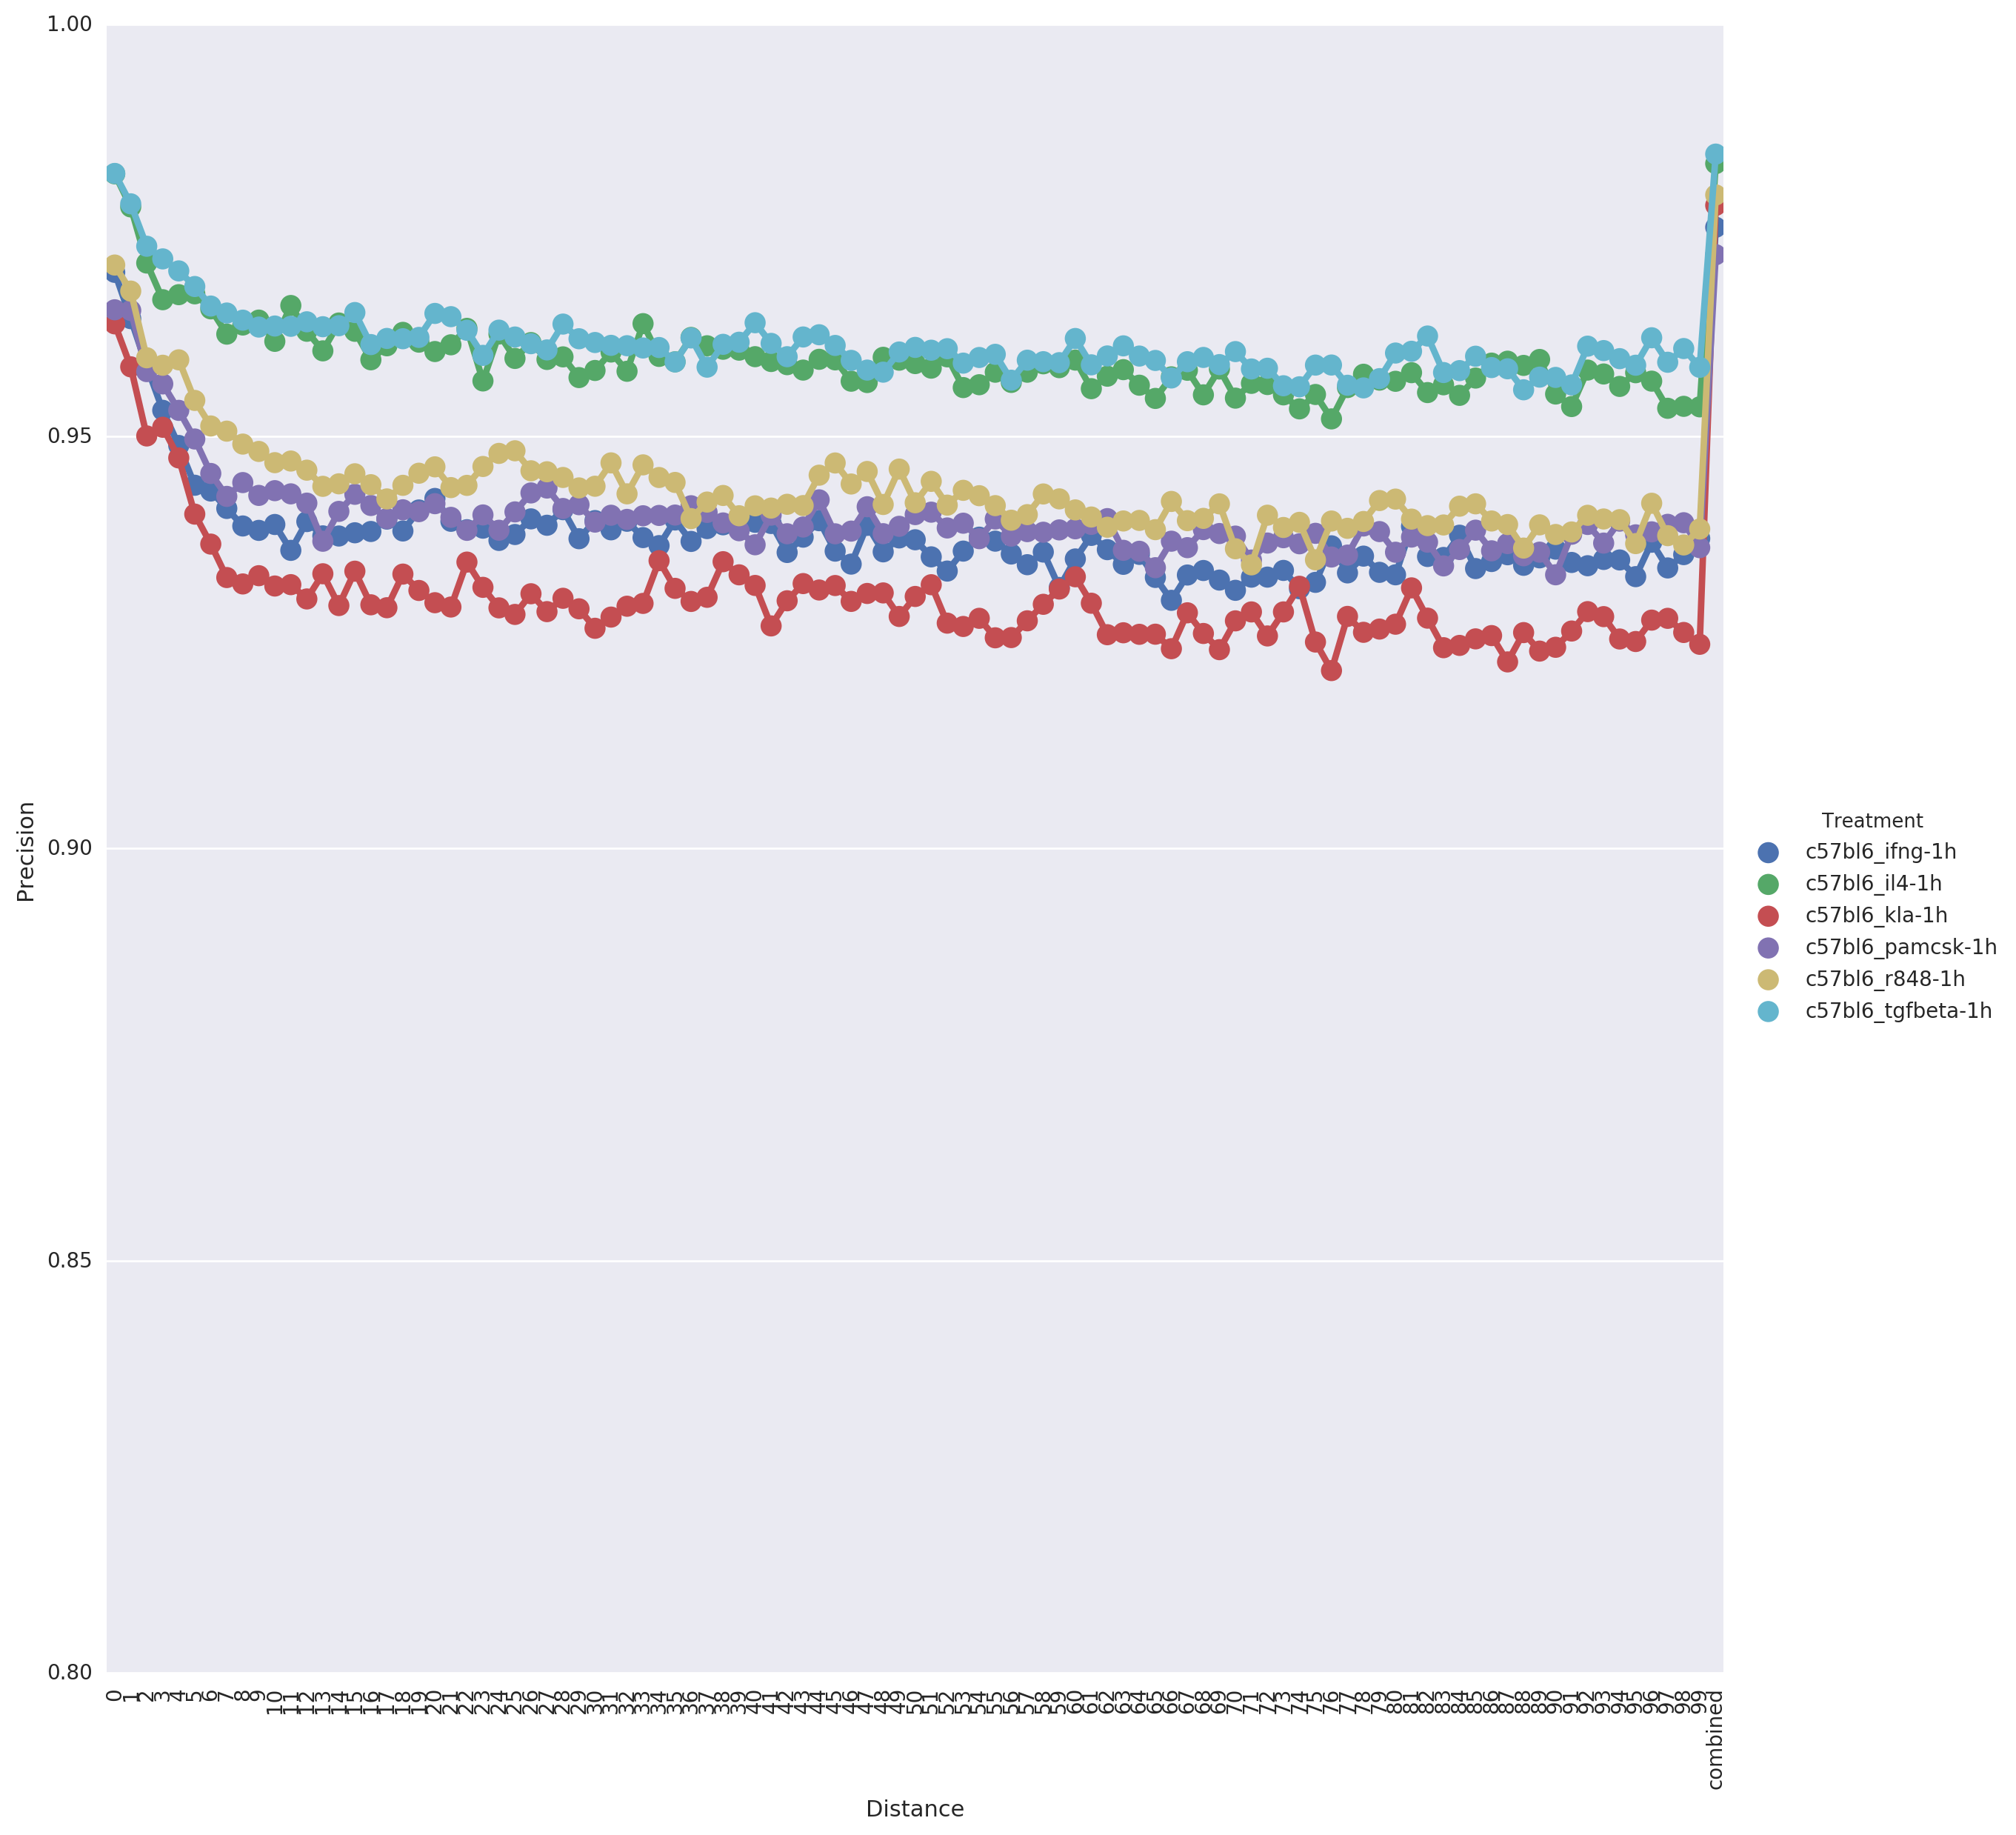

In [30]:
sns.factorplot(data=performance_promoter_frame,
               x = 'Distance',
               y = 'Precision',
               hue = 'Treatment',
               size = 12,
               kind ='point',
               
              )
# plt.xticks([])
plt.ylim(0.8,1.0)
plt.xticks(rotation=90)


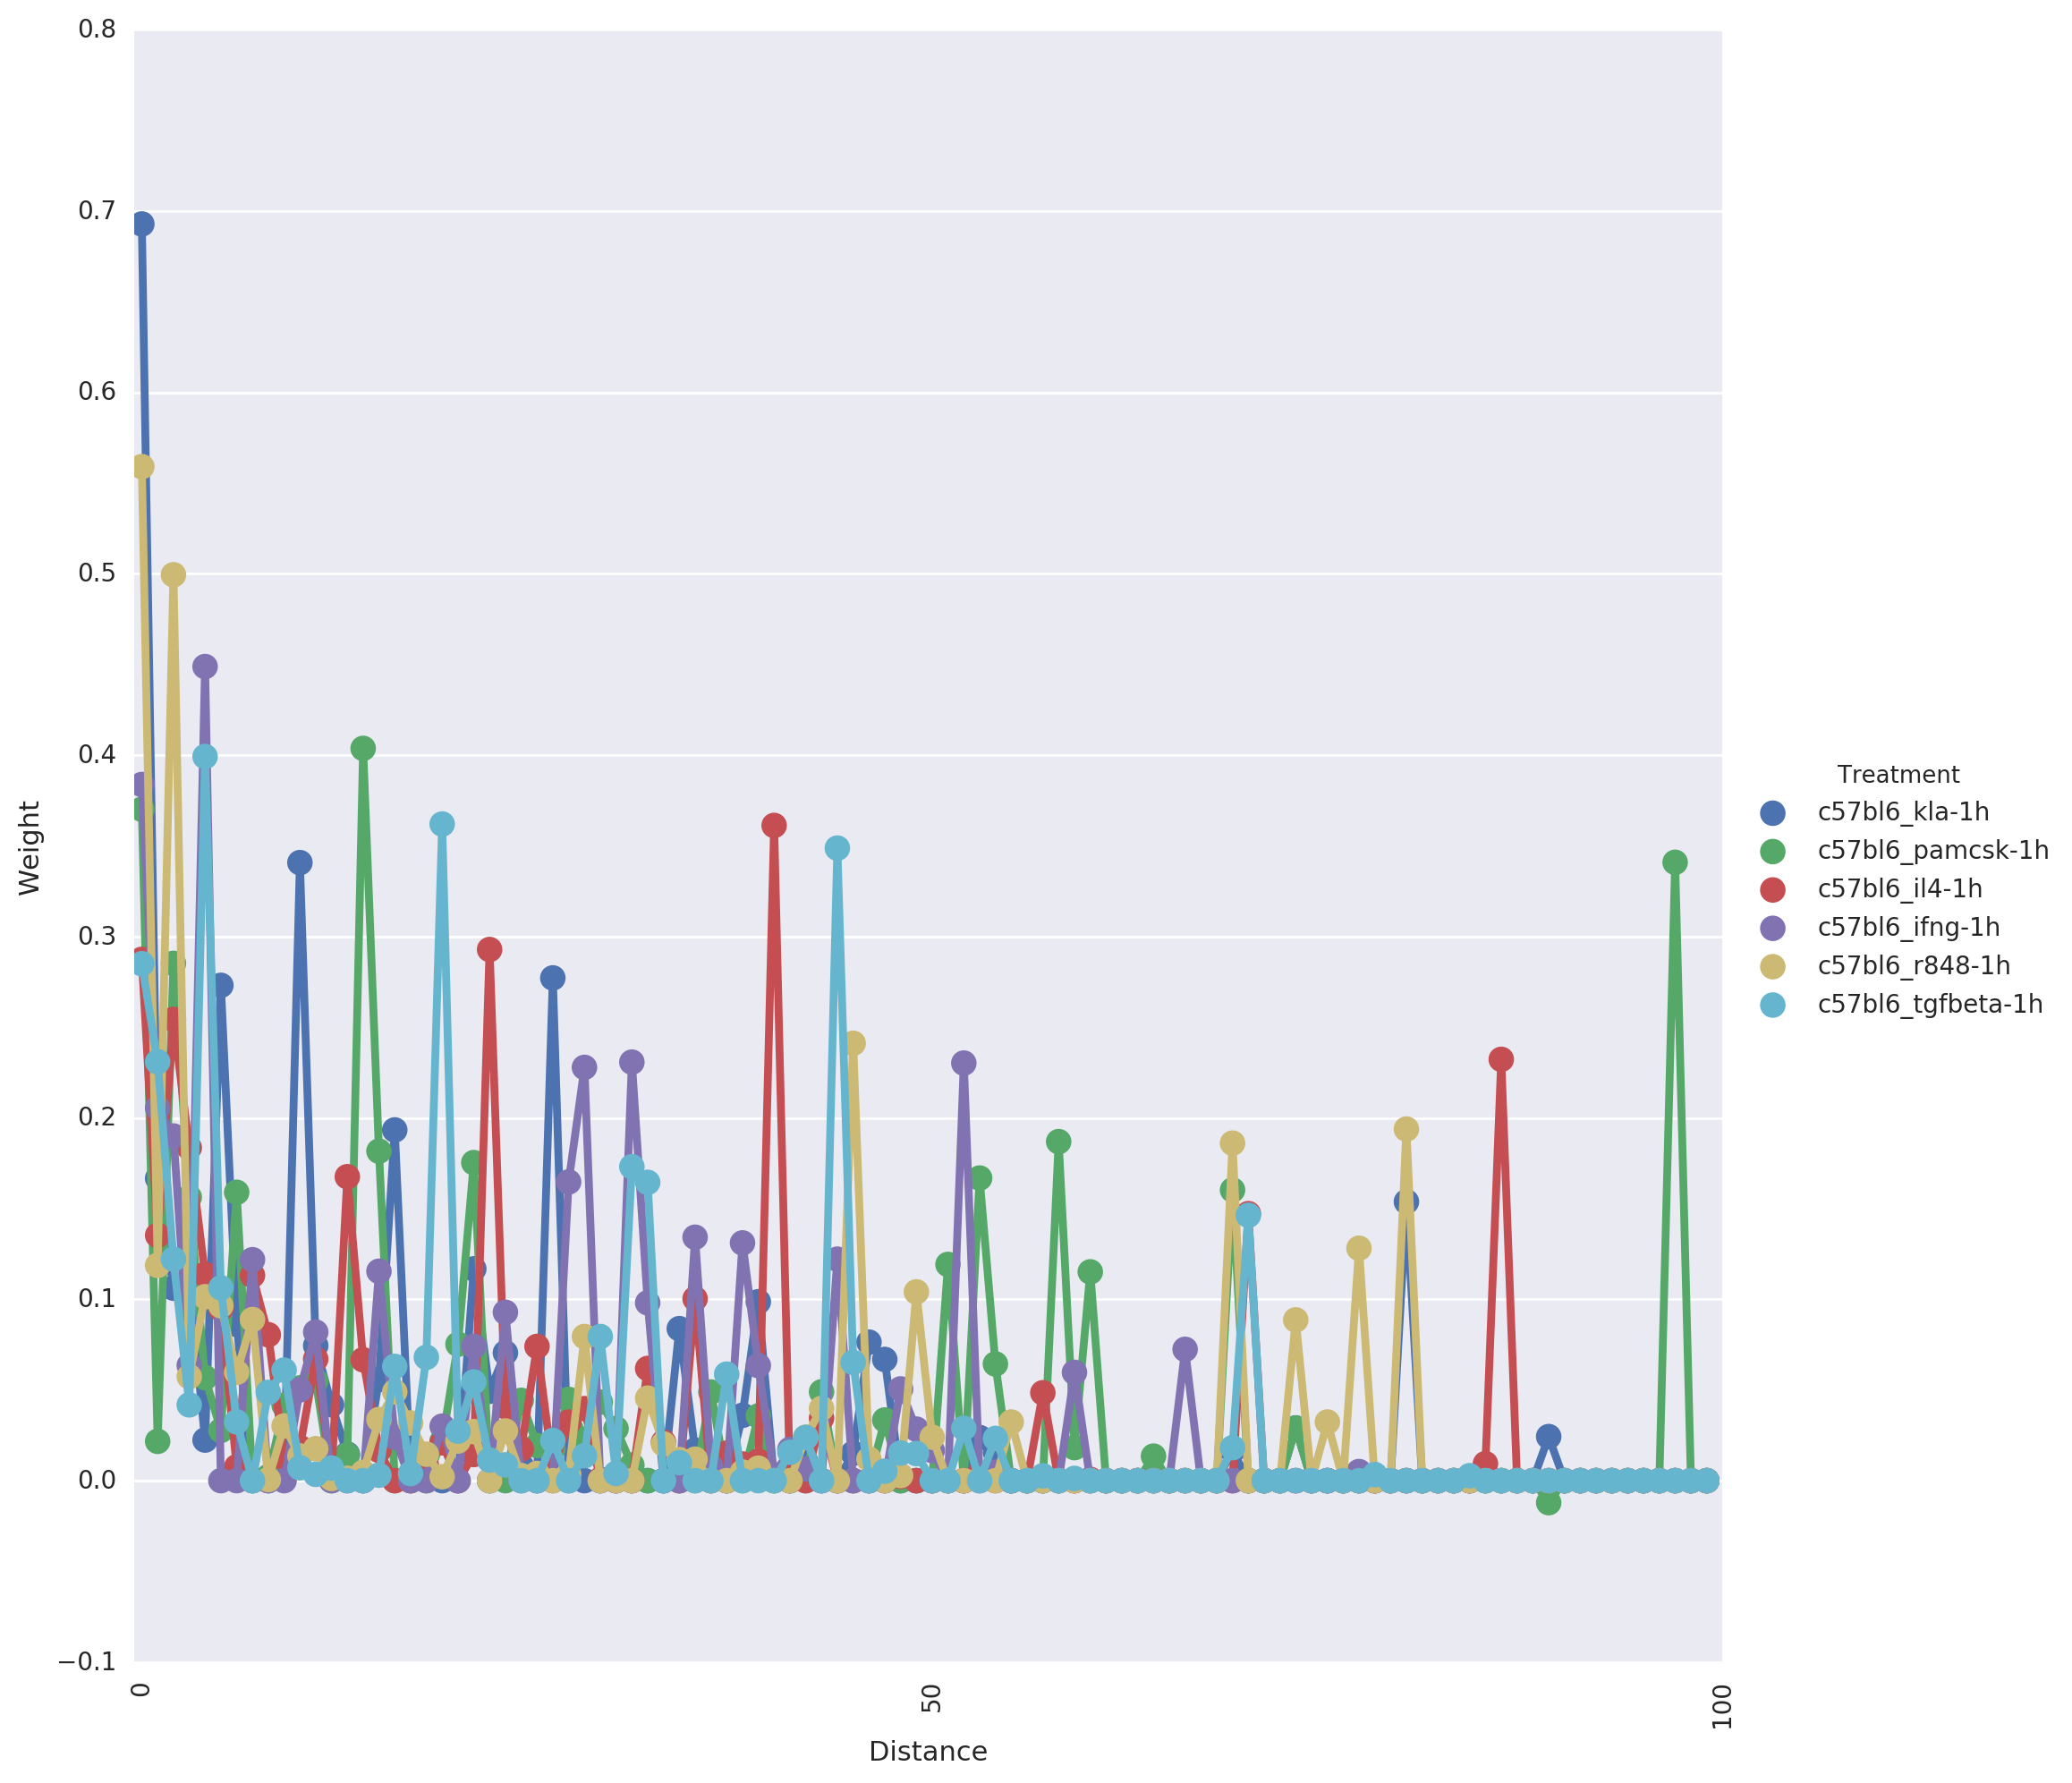

In [29]:
# average weights somehow...
treatments = []
distances = []
weights = []
for treatment in combined_weights_promoter_dict.keys():
    weights = weights + list(np.mean(combined_weights_promoter_dict[treatment], axis=0))
    treatments = treatments + [treatment] * 100
    distances = distances + list(range(100))
    

frame = pd.DataFrame({'Distance':distances, 'Weight':weights, 'Treatment':treatments})

sns.factorplot(data = frame, 
               x='Distance', 
               y='Weight', 
               hue='Treatment', 
               size=10,
              )
plt.xticks(rotation=90);
plt.xticks([0,50,100], [0,50,100]);

In [179]:
interaction_distances = range(100)
treatment_weight_dict = {}
for treatment in combined_weights_promoter_dict.keys():
    mean_combined_weights = np.mean(combined_weights_promoter_dict[treatment], axis=0)
    distance_weight_promoter_dict = dict(zip(interaction_distances, mean_combined_weights))
    individual_weights = []
    individual_distances = []

    for dist in interaction_distances:
        mean_individual_weights = np.mean(interaction_weights_promoter_dict[treatment][dist], axis=0)
        distance_weight = distance_weight_promoter_dict[dist]
        weighted_weights =  distance_weight * mean_individual_weights
        individual_weights.append(weighted_weights)
        individual_distances.append(np.array([dist] * len(weighted_weights)))
    individual_weights = np.array(individual_weights)
    zscore_weights = scipy.stats.zscore(individual_weights.flatten())
    individual_distances = np.array(individual_distances).flatten()
    treatment_weight_dict[treatment] = zscore_weights
kmer_pairs = list(interactionMatrix_frame_dict[0].columns.values)
index = []
for dist in interaction_distances:
    index = index + [str(dist) + '_' + str(x) for x in kmer_pairs]

treatment_weight_promoter_frame = pd.DataFrame(treatment_weight_dict, index = index)
treatment_weight_promoter_frame['distance'] = individual_distances


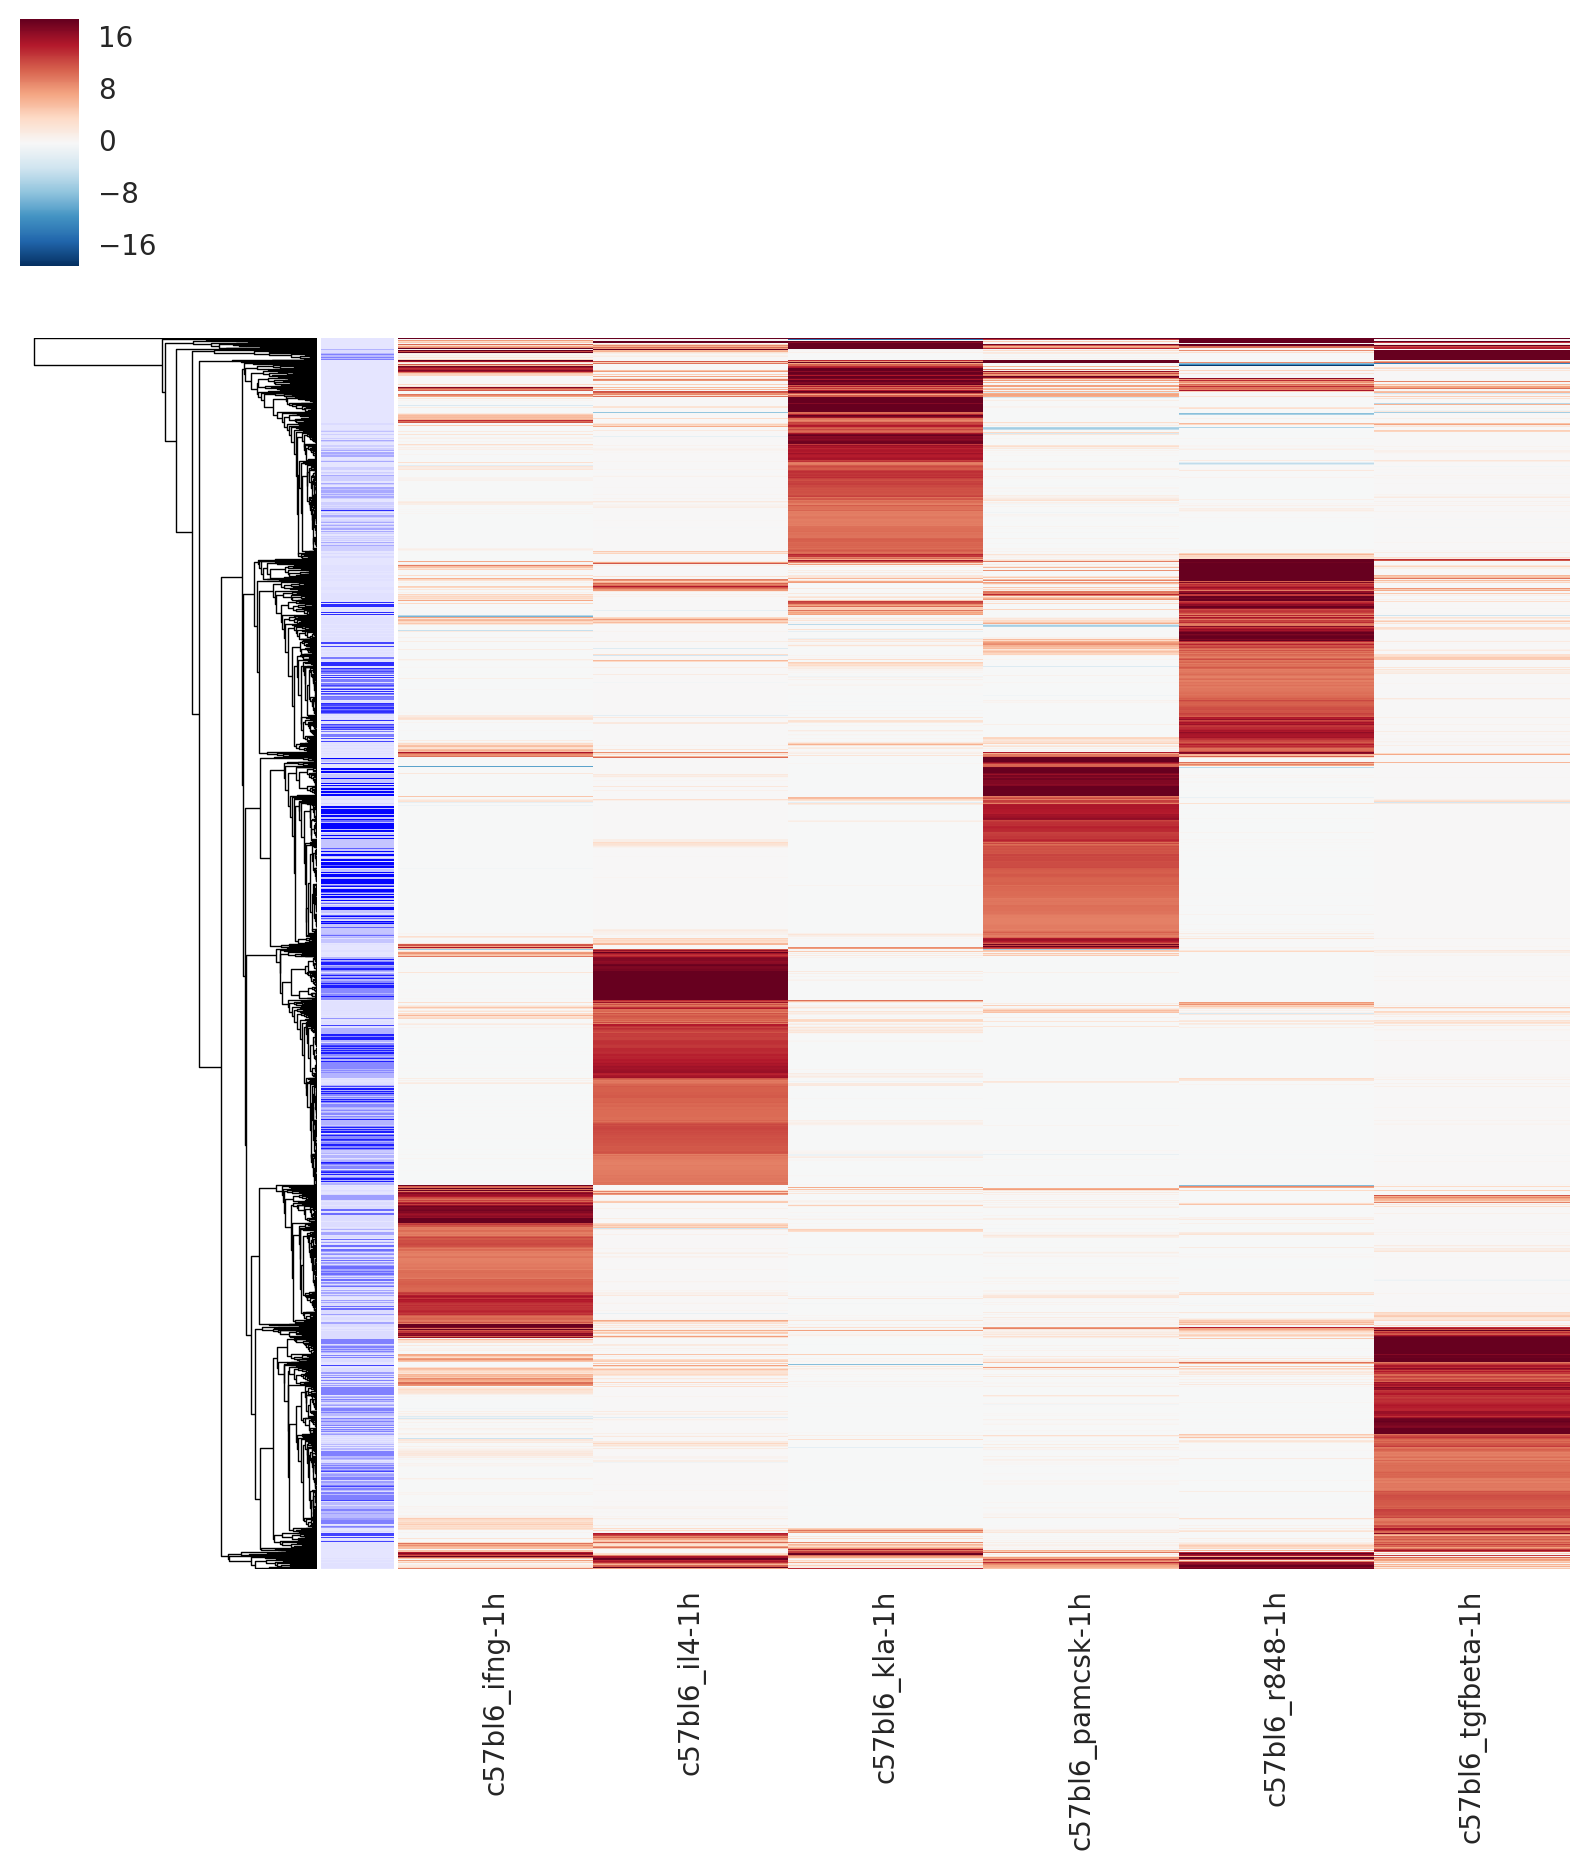

In [180]:

threshold = 9.5
treatments = sorted(combined_weights_promoter_dict.keys())
# data = treatment_weight_promoter_frame[(treatment_weight_promoter_frame[treatments].max(axis=1) > threshold) |
#                        (treatment_weight_promoter_frame[treatments].min(axis=1) < -1 *threshold)][treatments]
data = treatment_weight_promoter_frame[(treatment_weight_promoter_frame[treatments].max(axis=1) > threshold)]

distance_palette = sns.light_palette('blue', len(interaction_distances))

color_dict = dict(zip(interaction_distances, distance_palette))
colors = [color_dict[x] for x in data['distance'].values]
sns.clustermap(data = data[treatments], 
               row_colors = colors,
               yticklabels = False,
               row_cluster = True,
               col_cluster = False,
               vmin= -2*threadhold,
               vmax = 2*threshold)

### Non Promoter Peaks

In [ ]:
promoter_peakIDs= set(annotation_frame[annotation_frame['Annotation'].str.contains('promoter').fillna(False)].index.values
)
factor_list = []
treatment_list = []
auc_list = []
auc_type = []


strain = 'c57bl6'
interaction_distances = range(100)
interaction_weights_enhancer_dict = {}
combined_weights_enhancer_dict = {}
for treatment in ['c57bl6_ifng-1h',
                  'c57bl6_il4-1h', 
                  'c57bl6_kla-1h', 
                  'c57bl6_pamcsk-1h', 
                  'c57bl6_r848-1h',
                  'c57bl6_tgfbeta-1h']:
    print(treatment)
    start = time.time()
    treatment_indices = summary_frame[summary_frame[treatment] > 0.0].index.values
    target_indices = np.array(list(set(treatment_indices) - promoter_peakIDs))
    
#     background_indices = summary_background_frame[summary_background_frame[treatment + '-background'] > 0.0].index.values   # select subset of background indices to use
    background_indices = interactionMatrix_background_frame_dict[0].index.values
    shuffle(background_indices)
    background_indices = background_indices[:len(target_indices)]
#     background_indices = np.array(list(enhancer_peakIDs - set(treatment_indices)))

    training_classifier_scores = []
    testing_classifier_scores = []
    labels = pd.Series([True] * len(target_indices) + [False] * len(background_indices),
                               index = np.concatenate([target_indices, background_indices],axis=0))
    interaction_weights_enhancer_dict[treatment] = {}
    for i in range(numIterations):
        # split data
        training_labels, test_labels = get_split(labels, test_size = test_size)

        for interaction_distance in interaction_distances:
            # merge target and background features together 
            target_features = interactionMatrix_frame_dict[interaction_distance].ix[target_indices,:]
#             background_features = interactionMatrix_background_frame_dict[interaction_distance].ix[background_indices,:]
            background_features = interactionMatrix_background_frame_dict[interaction_distance].ix[background_indices,:]

            features = pd.concat([target_features, background_features])
            # standardize features
            training_features = features.ix[training_labels.index.values]
            test_features = features.ix[test_labels.index.values]

            # Train classifier for current distance
            current_classifier = sklearn.linear_model.LogisticRegression(penalty='l1', n_jobs=-1)
            current_classifier.fit(training_features, training_labels)

            # retrieve model coefficients
            current_coefficients = current_classifier.coef_.flatten()
            if not interaction_distance in interaction_weights_enhancer_dict[treatment]:
                interaction_weights_enhancer_dict[treatment][interaction_distance] = []
            interaction_weights_enhancer_dict[treatment][interaction_distance].append(current_coefficients)

            # generate features for ensemble classifier
            current_training_scores = current_classifier.decision_function(training_features)
            current_testing_scores = current_classifier.decision_function(test_features)
            training_classifier_scores.append(current_training_scores)
            testing_classifier_scores.append(current_testing_scores)

            # score current_classifier
            current_probas = current_classifier.predict_proba(test_features)
            current_roc = sklearn.metrics.roc_auc_score(test_labels, current_probas[:, 1], average = None)
            current_precision = sklearn.metrics.average_precision_score(test_labels, current_probas[:, 1], average = None)
            print(interaction_distance, current_roc, current_precision)

            treatment_list.append(treatment)
            auc_list.append(current_roc)
            auc_type.append(str(interaction_distance))

        # train combined classifier
        combined_classifier = sklearn.linear_model.LogisticRegression(penalty='l1', n_jobs=-1)
        training_combined_features = pd.DataFrame(training_classifier_scores).T
        testing_combined_features = pd.DataFrame(testing_classifier_scores).T
        combined_classifier.fit(training_combined_features, training_labels)

        # retrieve combined classifier coefficients
        combined_coefficients = combined_classifier.coef_.flatten()
        if not treatment in combined_weights_enhancer_dict:
            combined_weights_enhancer_dict[treatment] = []
        combined_weights_enhancer_dict[treatment].append(combined_coefficients)

        # score combined classifier
        combined_probas = combined_classifier.predict_proba(testing_combined_features)
        combined_roc = sklearn.metrics.roc_auc_score(test_labels, combined_probas[:, 1], average = None)
        combined_precision = sklearn.metrics.average_precision_score(test_labels, combined_probas[:, 1], average = None)
    end = time.time()

    print(treatment, combined_roc, combined_precision, end-start)
    treatment_list.append(treatment)
    auc_list.append(combined_roc)
    auc_type.append('combined')
    
performance_enhancer_frame = pd.DataFrame({
                     'Treatment':treatment_list,
                     'Precision':auc_list,
                     'Distance':auc_type})

(array([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,
         13,  14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,
         26,  27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,
         39,  40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,
         52,  53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,
         65,  66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,
         78,  79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,
         91,  92,  93,  94,  95,  96,  97,  98,  99, 100]),
 <a list of 101 Text xticklabel objects>)

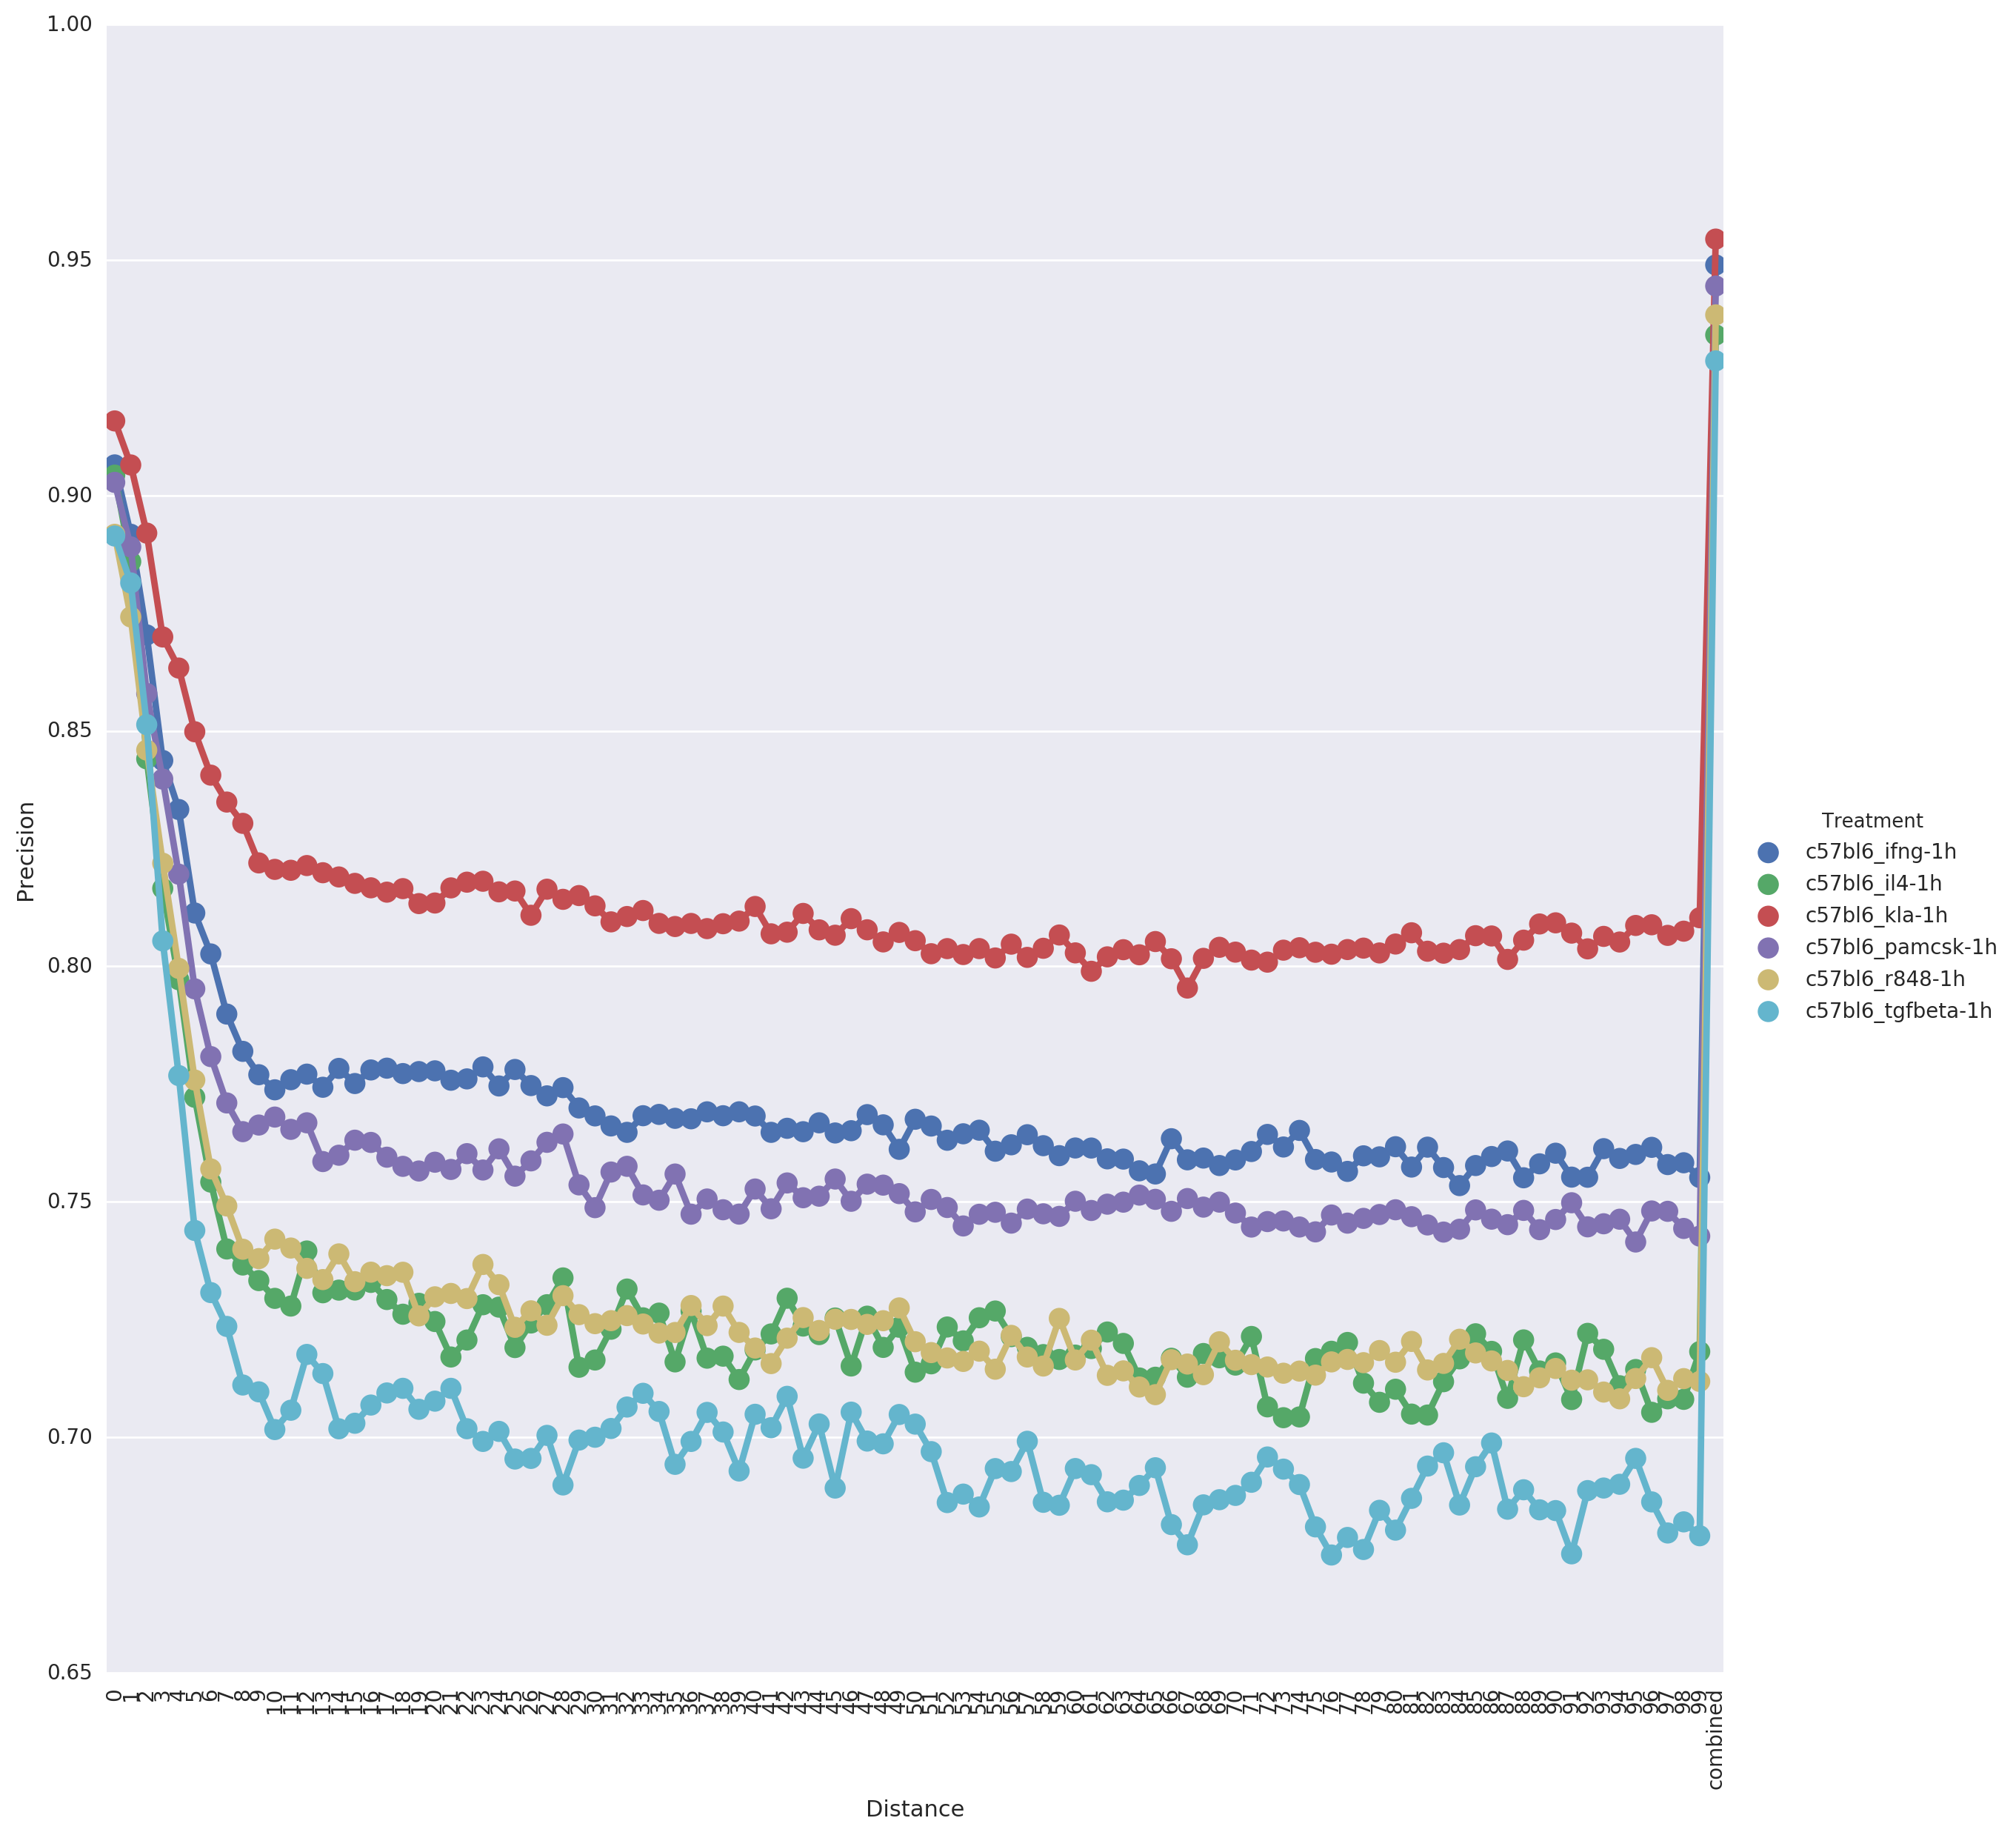

In [31]:
sns.factorplot(data=performance_enhancer_frame,
               x = 'Distance',
               y = 'Precision',
               hue = 'Treatment',
               size = 12,
               kind ='point',
               
              )
# plt.xticks([])
# plt.ylim(0.8,1.0)
plt.xticks(rotation=90)


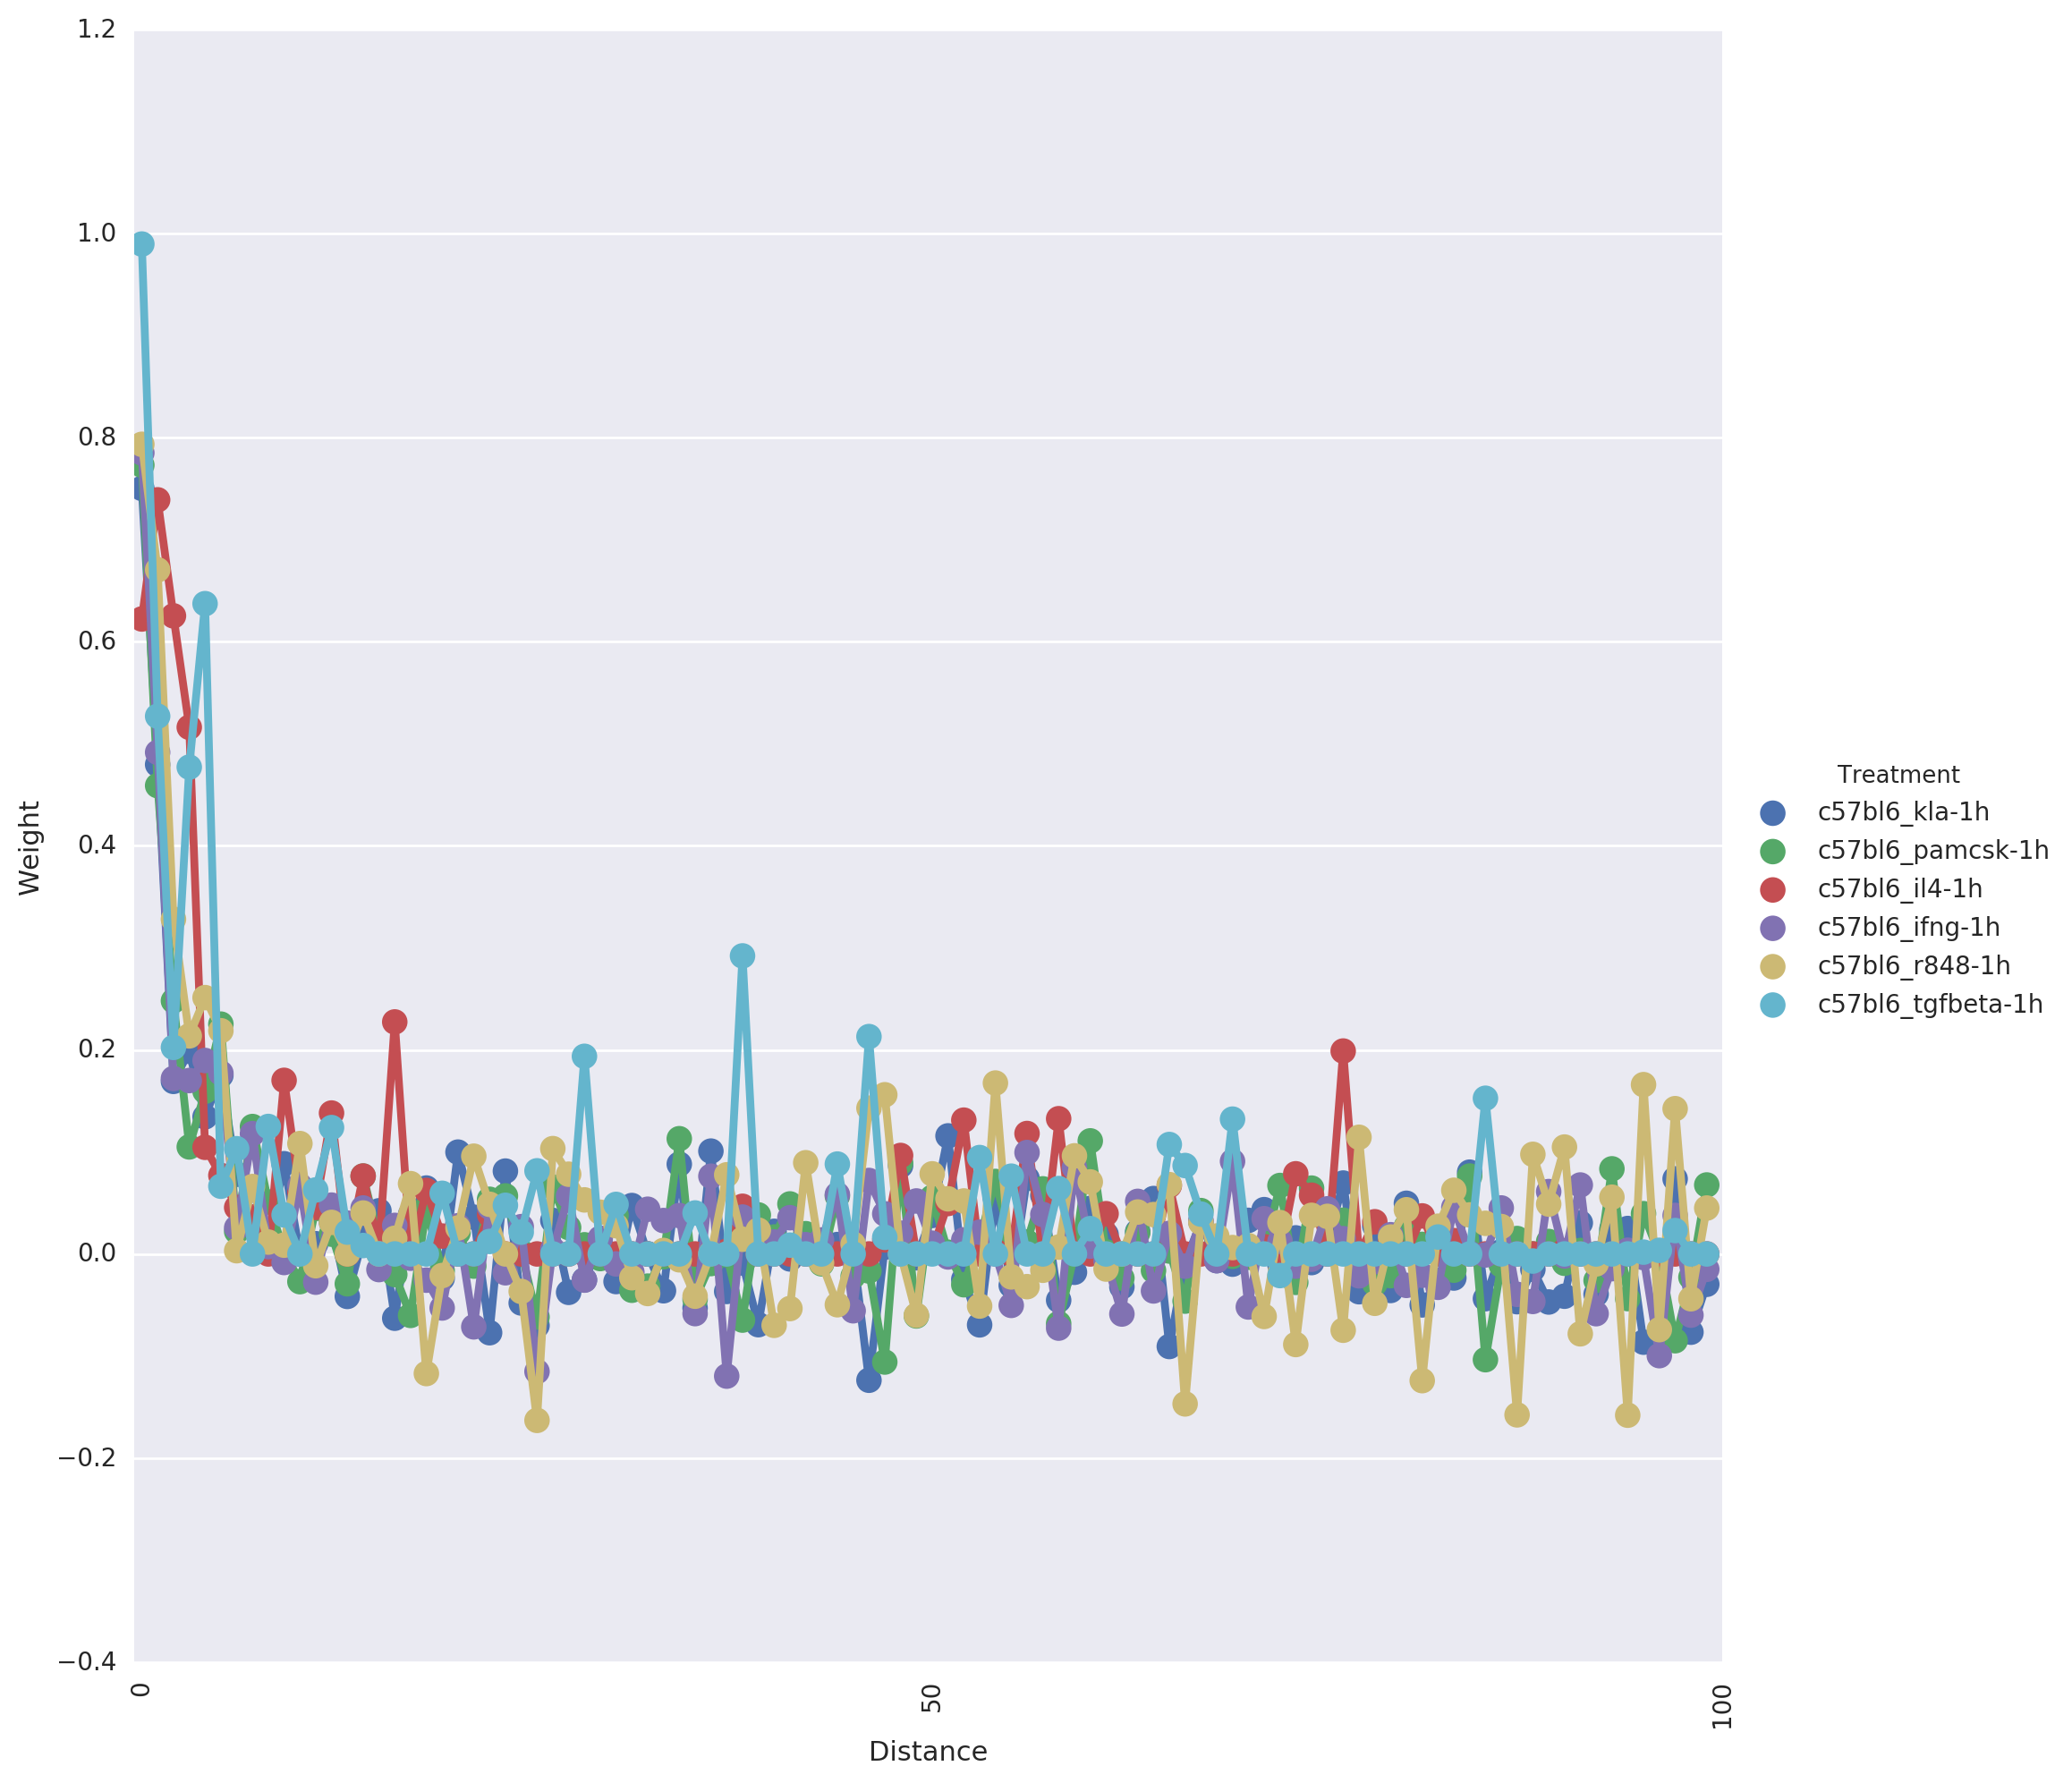

In [32]:
# average weights somehow...
treatments = []
distances = []
weights = []
for treatment in combined_weights_enhancer_dict.keys():
    weights = weights + list(np.mean(combined_weights_enhancer_dict[treatment], axis=0))
    treatments = treatments + [treatment] * 100
    distances = distances + list(range(100))
    

frame = pd.DataFrame({'Distance':distances, 'Weight':weights, 'Treatment':treatments})

sns.factorplot(data = frame, 
               x='Distance', 
               y='Weight', 
               hue='Treatment', 
               size=10,
              )
plt.xticks(rotation=90);
plt.xticks([0,50,100], [0,50,100]);

In [177]:
interaction_distances = range(100)
treatment_weight_dict = {}
for treatment in combined_weights_enhancer_dict.keys():
    mean_combined_weights = np.mean(combined_weights_enhancer_dict[treatment], axis=0)
    distance_weight_enhancer_dict = dict(zip(interaction_distances, mean_combined_weights))
    individual_weights = []
    individual_distances = []

    for dist in interaction_distances:
        mean_individual_weights = np.mean(interaction_weights_enhancer_dict[treatment][dist], axis=0)
        distance_weight = distance_weight_enhancer_dict[dist]
        weighted_weights =  distance_weight * mean_individual_weights
        individual_weights.append(weighted_weights)
        individual_distances.append(np.array([dist] * len(weighted_weights)))
    individual_weights = np.array(individual_weights)
    zscore_weights = scipy.stats.zscore(individual_weights.flatten())
    individual_distances = np.array(individual_distances).flatten()
    treatment_weight_dict[treatment] = zscore_weights
kmer_pairs = list(interactionMatrix_frame_dict[0].columns.values)
index = []
for dist in interaction_distances:
    index = index + [str(dist) + '_' + str(x) for x in kmer_pairs]

treatment_weight_enhancer_frame = pd.DataFrame(treatment_weight_dict, index = index)
treatment_weight_enhancer_frame['distance'] = individual_distances


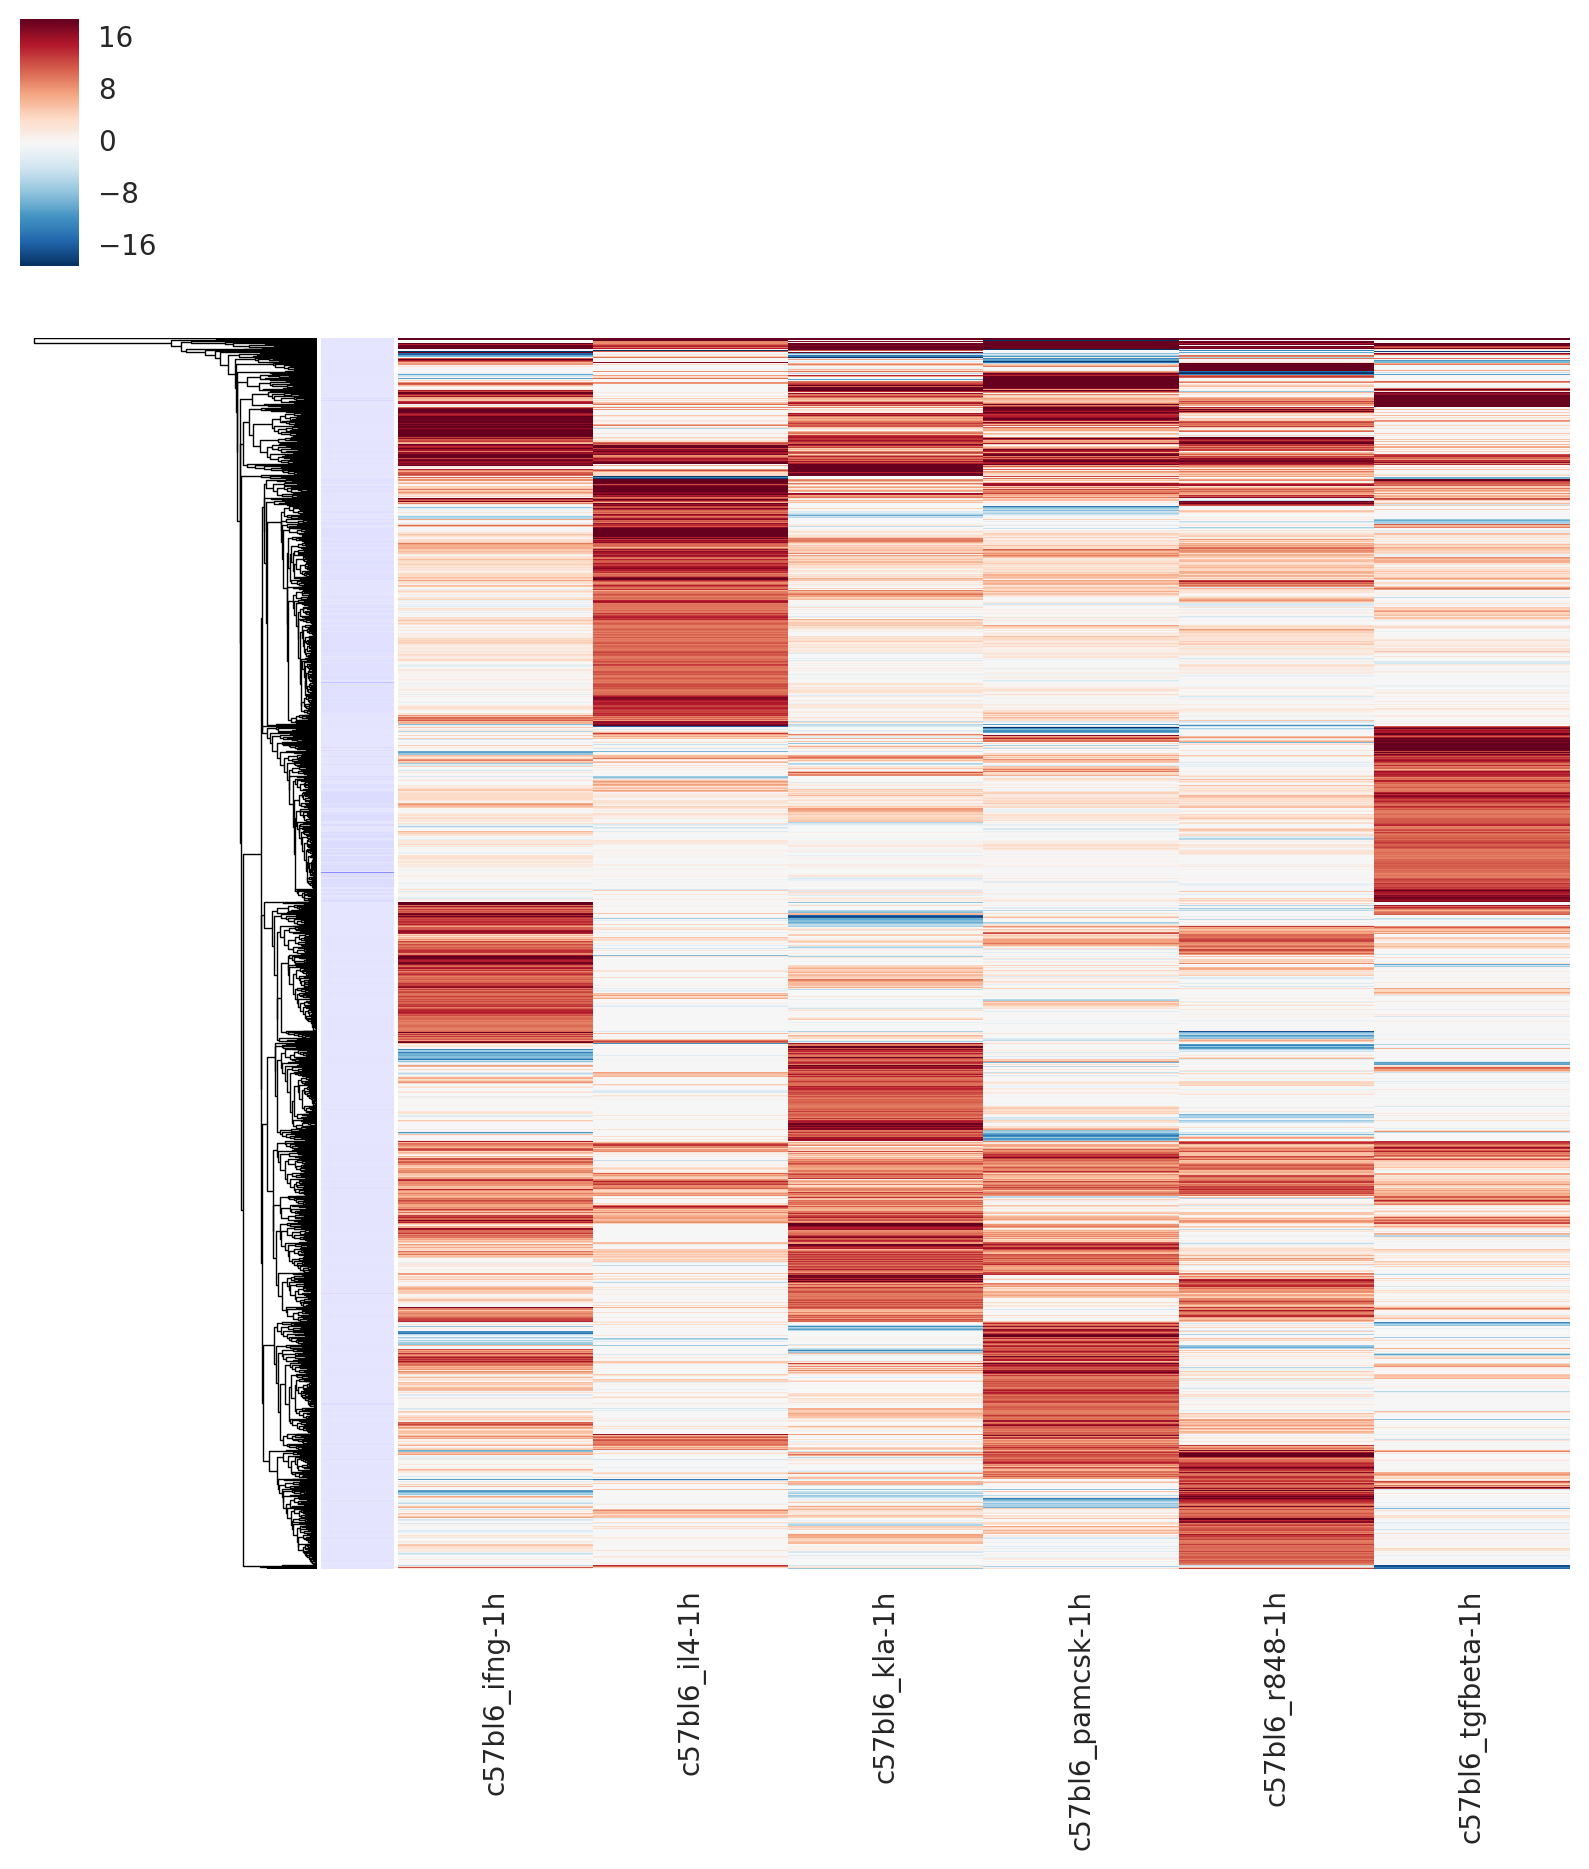

In [178]:

threshold = 9.5
treatments = sorted(combined_weights_enhancer_dict.keys())
# data = treatment_weight_enhancer_frame[(treatment_weight_enhancer_frame[treatments].max(axis=1) > threshold) |
#                        (treatment_weight_enhancer_frame[treatments].min(axis=1) < -1 *threshold)][treatments]
data = treatment_weight_enhancer_frame[(treatment_weight_enhancer_frame[treatments].max(axis=1) > threshold)]

distance_palette = sns.light_palette('blue', len(interaction_distances))

color_dict = dict(zip(interaction_distances, distance_palette))
colors = [color_dict[x] for x in data['distance'].values]
sns.clustermap(data = data[treatments], 
               row_colors = colors,
               yticklabels = False,
               row_cluster = True,
               col_cluster = False,
               vmin= -2*threadhold,
               vmax = 2*threshold)